# 2.1.3.	Synthetic - 2D Magnetic Data Filters#


2D magnetic data filters are commonly applied to magnetic data to allow us to view that data in different ways. They can highlight shallower or deeper magnetic sources, and can emphasize gradients in the magnetic data that occur at geological contacts and in association with structure.

We use the same synthetic model here as in the previous notebook to demonstrate the effects of various 2D magnetic filters.

Short descriptions of select filters are provided in the sections below. Summaries of various filters and their role in gravity and magnetic data interpretation can be found in Roest et al., 1992, MacLeod et al., 1993, Miller and Singh, 1994, Milligan and Gunn, 1997, Verduzco et al., 2004, Isles and Rankin, 2013, Dentith and Mudge, 2014.  



## Total magnetic intensity data

The below image shows the total magnetic intensity (TMI) that was calculated from the synthetic geologic model. The response is based on magnetic field parameters at the north pole, in other words, the magnetic field is vertical.  

In [1]:
## Load all libraries and setup the synthetic problem
from library.Mag import Mag, ProblemSetter, MathUtils, Simulator, DataIO

# Load data and topo and build default model
workDir = "./assets/Synthetic/"
fName = 'DataGrid.tiff'

dataGrid = DataIO.loadGeoTiffFile(workDir + fName, plotIt=True)

## Upward continuation

Upward continuation can be considered a ‘wavelength’ filter. Upward continuation simulates the magnetic response that would be observed if data were collected at a greater height above the Earth’s surface than it was actually collected. The result is that longer-wavelength, deeper features are emphasized over shorter-wavelength, near-surface features. It is effective for interpretation of deeper geology, or for reducing noise that may be found in data collected very close to the ground. 

You can alternate between the upward contined response here and the TMI data using the drop-down menu labelled 'Grid Filters'. Change the upward continuation height, or distance, using the slider bar labelled 'UpDist' (the default is 0 m, so you will need to change it to observe a change in the data). Note the small magnetic anomaly and the narrow fault feature quickly become indistinct with increased height. 

In [2]:
selection = Simulator.gridFiltersWidget(dataGrid, gridFilter='upwardContinuation')
display(selection)

interactive(children=(FloatSlider(value=90.0, continuous_update=False, description='SunAzimuth', max=360.0, step=5.0), FloatSlider(value=15.0, continuous_update=False, description='SunAngle', max=90.0, step=5.0), FloatSlider(value=0.9, continuous_update=False, description='ColorTransp', max=1.0, step=0.05), FloatSlider(value=0.5, continuous_update=False, description='HSTransp', max=1.0, step=0.05), FloatSlider(value=5.0, continuous_update=False, description='vScale', max=10.0, min=1.0, step=1.0), Dropdown(description='ColorMap', index=3, options=('viridis', 'plasma', 'magma', 'RdBu_r', 'Greys_r', 'jet', 'rainbow', 'pink', 'bone', 'hsv', 'nipy_spectral'), value='RdBu_r'), Dropdown(description='Grid Filters', options=('upwardContinuation', 'TMI'), value='upwardContinuation'), FloatSlider(value=0.0, continuous_update=False, description='UpwardDistance', max=500.0, step=10.0), ToggleButton(value=False, description='Refresh', icon='check', tooltip='Description'), ToggleButton(value=False, description='Export Grid', icon='check', tooltip='Description'), Output()), _dom_classes=('widget-interact',))

## X and Y derivatives of the magnetic response

Calculating horizontal and vertical derivatives of the magnetic response gives us a way to better visualize local gradients in the data that can be obscured by larger and deeper features in the total field response. X and Y derivatives are calculated based on the difference observed in the magnetic response between adjacent points, or grid cells, in the X and Y directions, respectively. Steep gradients usually occur at geologic contacts, faults, or fractures, where there is a distinct contrast in magnetic susceptibility. Interpreters should not consider X and Y derivative results independently, and should be sure to evaluate both, since visualizing gradients in one direction will de-emphasize features trending in the perpendicular direction. The X and Y derivatives are also used in the calculation of several other magnetic data filters.

Grids showing the X and Y derivatives are shown below. Note the emphases on east and west geological boundaries using the X derivative, and on the north and south geological boundaries using the Y derivative (best seen in relation to the smaller magnetic anomaly). Image sun-shading and color can be varied, and the filtered data can be compared with the original total mangetic intensity (TMI) data using the 'Grid Filters' drop-down menu. 

In [3]:
param = Simulator.gridFiltersWidget(selection.result, gridFilter='derivativeX', EPSGCode=26909)
display(param)

interactive(children=(FloatSlider(value=90.0, continuous_update=False, description='SunAzimuth', max=360.0, step=5.0), FloatSlider(value=15.0, continuous_update=False, description='SunAngle', max=90.0, step=5.0), FloatSlider(value=0.9, continuous_update=False, description='ColorTransp', max=1.0, step=0.05), FloatSlider(value=0.5, continuous_update=False, description='HSTransp', max=1.0, step=0.05), FloatSlider(value=5.0, continuous_update=False, description='vScale', max=10.0, min=1.0, step=1.0), Dropdown(description='ColorMap', index=3, options=('viridis', 'plasma', 'magma', 'RdBu_r', 'Greys_r', 'jet', 'rainbow', 'pink', 'bone', 'hsv', 'nipy_spectral'), value='RdBu_r'), Dropdown(description='Grid Filters', options=('derivativeX', 'TMI'), value='derivativeX'), ToggleButton(value=False, description='Refresh', icon='check', tooltip='Description'), ToggleButton(value=False, description='Export Grid', icon='check', tooltip='Description'), Output()), _dom_classes=('widget-interact',))

In [4]:
param = Simulator.gridFiltersWidget(selection.result, gridFilter='derivativeY', EPSGCode=26909)
display(param)

interactive(children=(FloatSlider(value=90.0, continuous_update=False, description='SunAzimuth', max=360.0, step=5.0), FloatSlider(value=15.0, continuous_update=False, description='SunAngle', max=90.0, step=5.0), FloatSlider(value=0.9, continuous_update=False, description='ColorTransp', max=1.0, step=0.05), FloatSlider(value=0.5, continuous_update=False, description='HSTransp', max=1.0, step=0.05), FloatSlider(value=5.0, continuous_update=False, description='vScale', max=10.0, min=1.0, step=1.0), Dropdown(description='ColorMap', index=3, options=('viridis', 'plasma', 'magma', 'RdBu_r', 'Greys_r', 'jet', 'rainbow', 'pink', 'bone', 'hsv', 'nipy_spectral'), value='RdBu_r'), Dropdown(description='Grid Filters', options=('derivativeY', 'TMI'), value='derivativeY'), ToggleButton(value=False, description='Refresh', icon='check', tooltip='Description'), ToggleButton(value=False, description='Export Grid', icon='check', tooltip='Description'), Output()), _dom_classes=('widget-interact',))

## Upward continuation - duplicate?

Upward continuation can be considered a ‘wavelength’ filter. Upward continuation simulates the magnetic response that would be observed if data were collected at a greater height above the Earth’s surface than it was actually collected. The result is that longer-wavelength, deeper features are emphasized over shorter-wavelength, near-surface features. It is effective for interpretation of deeper geology, or for reducing noise that may be found in data collected very close to the ground. 

You can alternate between the upward contined response here and the TMI data. Change the upward continuation distance using the slider bar. Note the small magnetic anomaly and the narrow fault feature become less distinct with increased distance. 

In [5]:
param = Simulator.gridFiltersWidget(selection.result, gridFilter='upwardContinuation', EPSGCode=26909)
display(param)

interactive(children=(FloatSlider(value=90.0, continuous_update=False, description='SunAzimuth', max=360.0, step=5.0), FloatSlider(value=15.0, continuous_update=False, description='SunAngle', max=90.0, step=5.0), FloatSlider(value=0.9, continuous_update=False, description='ColorTransp', max=1.0, step=0.05), FloatSlider(value=0.5, continuous_update=False, description='HSTransp', max=1.0, step=0.05), FloatSlider(value=5.0, continuous_update=False, description='vScale', max=10.0, min=1.0, step=1.0), Dropdown(description='ColorMap', index=3, options=('viridis', 'plasma', 'magma', 'RdBu_r', 'Greys_r', 'jet', 'rainbow', 'pink', 'bone', 'hsv', 'nipy_spectral'), value='RdBu_r'), Dropdown(description='Grid Filters', options=('upwardContinuation', 'TMI'), value='upwardContinuation'), FloatSlider(value=0.0, continuous_update=False, description='UpwardDistance', max=500.0, step=10.0), ToggleButton(value=False, description='Refresh', icon='check', tooltip='Description'), ToggleButton(value=False, description='Export Grid', icon='check', tooltip='Description'), Output()), _dom_classes=('widget-interact',))

## Vertical derivative

A very commonly used magnetic filter is the first vertical derivative. This process considers the change in the magnetic response when calculated at two different heights above the ground. The effect is to emphasize near-surface features where the difference between the responses calculated at two different heights will be largest. First vertical derivative anomalies will highlight edges of magnetic sources, and appear over the top of the source if the contact or feature is vertical. 

Notice how the first vertical derivative peaks directly over the small magnetic body from the synthetic geologic model. It also highlights the edge, and main body, of the large eastern magnetic block. 

In [6]:
param = Simulator.gridFiltersWidget(selection.result, gridFilter='firstVertical', EPSGCode=26909)
display(param)

interactive(children=(FloatSlider(value=90.0, continuous_update=False, description='SunAzimuth', max=360.0, step=5.0), FloatSlider(value=15.0, continuous_update=False, description='SunAngle', max=90.0, step=5.0), FloatSlider(value=0.9, continuous_update=False, description='ColorTransp', max=1.0, step=0.05), FloatSlider(value=0.5, continuous_update=False, description='HSTransp', max=1.0, step=0.05), FloatSlider(value=5.0, continuous_update=False, description='vScale', max=10.0, min=1.0, step=1.0), Dropdown(description='ColorMap', index=3, options=('viridis', 'plasma', 'magma', 'RdBu_r', 'Greys_r', 'jet', 'rainbow', 'pink', 'bone', 'hsv', 'nipy_spectral'), value='RdBu_r'), Dropdown(description='Grid Filters', options=('firstVertical', 'TMI'), value='firstVertical'), ToggleButton(value=False, description='Refresh', icon='check', tooltip='Description'), ToggleButton(value=False, description='Export Grid', icon='check', tooltip='Description'), Output()), _dom_classes=('widget-interact',))

## Total horizontal derivative

The total horizontal derivative simply combines the X and Y derivatives. Gradients in both directions are now accounted for in a single map. The highest total horizontal derivative values occur at the edges or boundaries of magnetic sources. It does not detect narrow sources as effectively as the vertical derivative.

The total horizonal derivative can be seen to peak here over the edges of the small magnetic body, and along the margin of the large magnetic block in the east. 

interactive(children=(FloatSlider(value=90.0, continuous_update=False, description='SunAzimuth', max=360.0, step=5.0), FloatSlider(value=15.0, continuous_update=False, description='SunAngle', max=90.0, step=5.0), FloatSlider(value=0.9, continuous_update=False, description='ColorTransp', max=1.0, step=0.05), FloatSlider(value=0.5, continuous_update=False, description='HSTransp', max=1.0, step=0.05), FloatSlider(value=5.0, continuous_update=False, description='vScale', max=10.0, min=1.0, step=1.0), Dropdown(description='ColorMap', index=3, options=('viridis', 'plasma', 'magma', 'RdBu_r', 'Greys_r', 'jet', 'rainbow', 'pink', 'bone', 'hsv', 'nipy_spectral'), value='RdBu_r'), Dropdown(description='Grid Filters', options=('totalHorizontal', 'TMI'), value='totalHorizontal'), ToggleButton(value=False, description='Refresh', icon='check', tooltip='Description'), ToggleButton(value=False, description='Export Grid', icon='check', tooltip='Description'), Output()), _dom_classes=('widget-interact',))

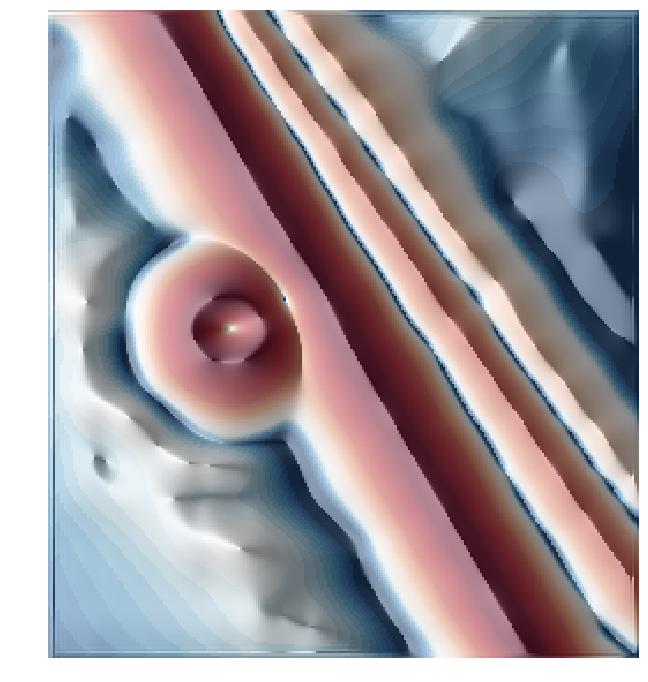

In [7]:
param = Simulator.gridFiltersWidget(selection.result, gridFilter='totalHorizontal', EPSGCode=26909)
display(param)

## Tilt angle

The tilt derivative, or tilt angle, normalizes the vertical derivative by the horizontal derivatives. A magnetic source exhibiting a strong contrast with surrounding rocks (e.g. a large, near surface, magnetic unit) will yield both high vertical and horizontal gradients, and a more weakly contrasting body will yield proportionally smaller vertical and horizontal gradients. Normalizing the vertical by horizontal derivatives means different amplitude responses are assigned equivalent values. This is a very useful filter for enhancing more subtle features in the magnetic data. The tilt angle ranges from -90 to +90 degrees, is positive over the magnetic source, and negative outside the source, with the body’s edge delimited by the 0 degree contour.

It is helpful to view the tilt angle using a color map that highlights the middle, or near-zero tilt angle values, which should trace source edges. For example, the red-blue color map (RdBu). 

In the grid image below, you can see that zero values trace the edge of the small magnetic body, with positive tilt angle values directly over the top of the body (inside) and negative values outside the magnetic body. Zero values also mark the edge of the large eastern magnetic block, as well as the margins of the northwest-trending fault that cross-cuts the eastern block.   

In [8]:
param = Simulator.gridFiltersWidget(selection.result, gridFilter='tiltAngle', EPSGCode=26909)
display(param)

interactive(children=(FloatSlider(value=90.0, continuous_update=False, description='SunAzimuth', max=360.0, step=5.0), FloatSlider(value=15.0, continuous_update=False, description='SunAngle', max=90.0, step=5.0), FloatSlider(value=0.9, continuous_update=False, description='ColorTransp', max=1.0, step=0.05), FloatSlider(value=0.5, continuous_update=False, description='HSTransp', max=1.0, step=0.05), FloatSlider(value=5.0, continuous_update=False, description='vScale', max=10.0, min=1.0, step=1.0), Dropdown(description='ColorMap', index=3, options=('viridis', 'plasma', 'magma', 'RdBu_r', 'Greys_r', 'jet', 'rainbow', 'pink', 'bone', 'hsv', 'nipy_spectral'), value='RdBu_r'), Dropdown(description='Grid Filters', options=('tiltAngle', 'TMI'), value='tiltAngle'), ToggleButton(value=False, description='Refresh', icon='check', tooltip='Description'), ToggleButton(value=False, description='Export Grid', icon='check', tooltip='Description'), Output()), _dom_classes=('widget-interact',))

## Analytic signal

Analytic signal is also known as the total gradient. It is calculated from the vertical and horizontal derivatives. The advantage is that we now capture gradients in all three directions, further enhancing detection of geologic boundaries and structures. The analytic signal peaks above narrow bodies and along the edges of larger geologic features that are in magnetic contrast to their surroundings. The analytic signal is a very useful interpretation product in areas where magnetic remanence is suspected, and in areas of low latitude since it is not affected by magnetisation direction.  

The analytic signal from the synthetic model looks similar to the first vertical derivative since an anomaly is mapped directly over smaller magnetic body, however if differs in that it maps only the edge of the larger eastern magnetic block but not the top.     

In [9]:
param = Simulator.gridFiltersWidget(selection.result, gridFilter='analyticSignal', EPSGCode=26909)
display(param)

interactive(children=(FloatSlider(value=90.0, continuous_update=False, description='SunAzimuth', max=360.0, step=5.0), FloatSlider(value=15.0, continuous_update=False, description='SunAngle', max=90.0, step=5.0), FloatSlider(value=0.9, continuous_update=False, description='ColorTransp', max=1.0, step=0.05), FloatSlider(value=0.5, continuous_update=False, description='HSTransp', max=1.0, step=0.05), FloatSlider(value=5.0, continuous_update=False, description='vScale', max=10.0, min=1.0, step=1.0), Dropdown(description='ColorMap', index=3, options=('viridis', 'plasma', 'magma', 'RdBu_r', 'Greys_r', 'jet', 'rainbow', 'pink', 'bone', 'hsv', 'nipy_spectral'), value='RdBu_r'), Dropdown(description='Grid Filters', options=('analyticSignal', 'TMI'), value='analyticSignal'), ToggleButton(value=False, description='Refresh', icon='check', tooltip='Description'), ToggleButton(value=False, description='Export Grid', icon='check', tooltip='Description'), Output()), _dom_classes=('widget-interact',))